In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, SeparableConv2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


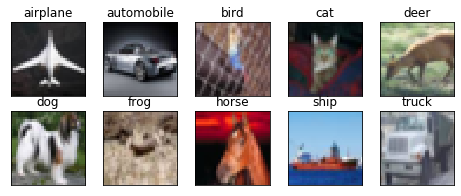

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 17s 43ms/step - loss: 1.8323 - acc: 0.3050 - val_loss: 1.3921 - val_acc: 0.4895
Epoch 2/50
390/390 [==============================] - 7s 19ms/step - loss: 1.3237 - acc: 0.5231 - val_loss: 1.1247 - val_acc: 0.5865
Epoch 3/50
390/390 [==============================] - 7s 19ms/step - loss: 1.1088 - acc: 0.6082 - val_loss: 0.9720 - val_acc: 0.6589
Epoch 4/50
390/390 [==============================] - 7s 19ms/step - loss: 0.9564 - acc: 0.6660 - val_loss: 0.8204 - val_acc: 0.7124
Epoch 5/50
390/390 [==============================] - 7s 19ms/step - loss: 0.8632 - acc: 0.7015 - val_loss: 0.7705 - val_acc: 0.7326
Epoch 6/50
390/390 [==============================] - 7s 19ms/step - loss: 0.7857 - acc: 0.7313 - val_loss: 0.7657 - val_acc: 0.7453
Epoch 7/50
390/390 [==============================] - 7s 19ms/step - loss: 0.7355 - acc: 0.7494 - val_loss: 0.6982 - val_acc: 0.7637
Epoch 8/50
390/390 [==============================] - 7s 19m

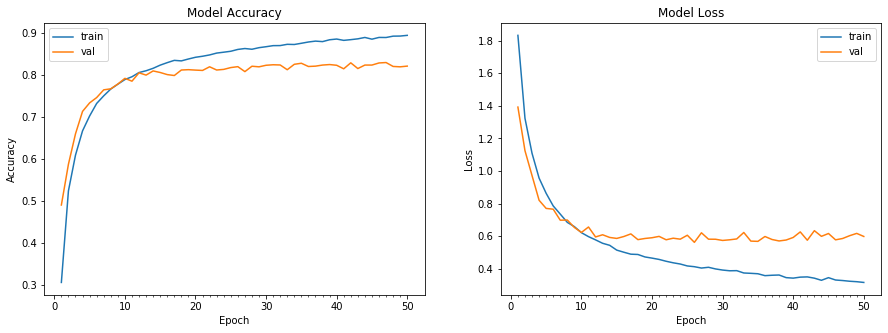

Accuracy on test data is: 82.02


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [112]:
# Define the model
model = Sequential()

model.add(SeparableConv2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3), use_bias = False, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(64, 3, 3, border_mode='same', use_bias = False, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))


model.add(SeparableConv2D(128, 3, 3, border_mode='same', use_bias = False, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(156, 3, 3, border_mode='same', use_bias = False, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(SeparableConv2D(168, 3, 3, border_mode='same', use_bias = False, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(SeparableConv2D(168, 1, 1, activation='relu', use_bias = False, kernel_initializer='he_uniform'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
model.add(SeparableConv2D(10, 4, use_bias = False))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3..., use_bias=False, kernel_initializer="he_uniform", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), use_bias=False, kernel_initializer="he_uniform", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3), use_bias=False, kernel_initializer="he_uniform", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(156, (3, 3), use_bias=False, kernel_i

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_309 (Separa (None, 32, 32, 32)        123       
_________________________________________________________________
batch_normalization_273 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_318 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_310 (Separa (None, 32, 32, 64)        2336      
_________________________________________________________________
batch_normalization_274 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
activation_319 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_139 (MaxPoolin (None, 16, 16, 64)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(168, (3, 3), use_bias=False, kernel_initializer="he_uniform", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(168, (1, 1), activation="relu", use_bias=False, kernel_initializer="he_uniform")`


In [0]:
def scheduler(epoch, lr):
  return round(lr * 1/(1 + 0.319 * epoch), 10)

model.compile(optimizer=Adam(lr=0.0065), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
datagen = ImageDataGenerator(#rotation_range=15,
                              #width_shift_range=0.1, 
                              #height_shift_range=0.1,
                              horizontal_flip=False
                             )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  """


Epoch 1/50
390/390 [==============================] - 21s 54ms/step - loss: 1.3401 - acc: 0.5057 - val_loss: 1.6467 - val_acc: 0.4922
Epoch 2/50
390/390 [==============================] - 9s 24ms/step - loss: 0.9615 - acc: 0.6573 - val_loss: 1.1378 - val_acc: 0.6191
Epoch 3/50
390/390 [==============================] - 9s 24ms/step - loss: 0.8244 - acc: 0.7094 - val_loss: 1.0727 - val_acc: 0.6537
Epoch 4/50
390/390 [==============================] - 10s 24ms/step - loss: 0.7441 - acc: 0.7394 - val_loss: 0.8274 - val_acc: 0.7158
Epoch 5/50
390/390 [==============================] - 10s 25ms/step - loss: 0.6849 - acc: 0.7583 - val_loss: 0.9204 - val_acc: 0.6853
Epoch 6/50
390/390 [==============================] - 9s 24ms/step - loss: 0.6412 - acc: 0.7748 - val_loss: 0.8220 - val_acc: 0.7204
Epoch 7/50
390/390 [==============================] - 9s 24ms/step - loss: 0.6163 - acc: 0.7812 - val_loss: 0.7285 - val_acc: 0.7516
Epoch 8/50
390/390 [==============================] - 9s 24ms/step

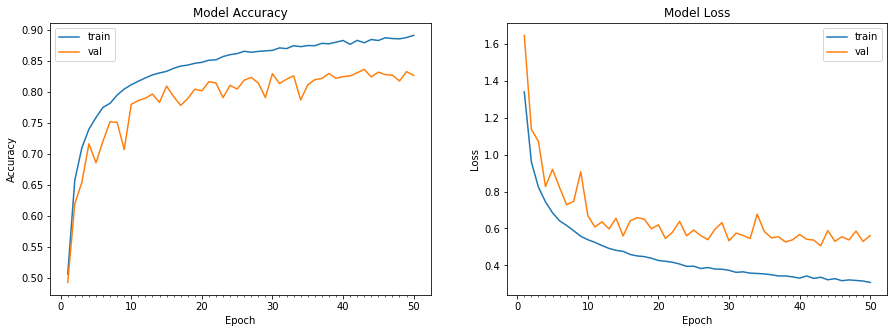

Accuracy on test data is: 82.63


In [115]:
# train the model
start = time.time()
# Train the model
new_model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))


# plot model history
plot_model_history(new_model_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))